#**<font color='red'><center><u>Image Classification on CIFAR - 10</center>**

##**<font color='green'><center><u>Introduction to Deep Learning Project Assignment - CSE235</center>**



##**<font color='blue'><u>Group Members: (6COM2) </center>**

*   Iril Veneza - 20191COM0076
*   Keerthana P - 20191COM0099
*   Ronit Reddy - 20191COM0115
*   Tanushree B S - 20191COM0241 





- **Image Classification** is a method to *classify the images* into their *respective category classes*. 

- **CIFAR-10 Dataset** as it suggests has 10 different categories of images in it. There is a total of *<u>60000 images of 10 different classes</u>* naming Airplane, Automobile, Bird, Cat, Deer, Dog, Frog, Horse, Ship, Truck. All the images are of size 32×32. There are in total *<u>50000 train images and 10000 test images</u>*.









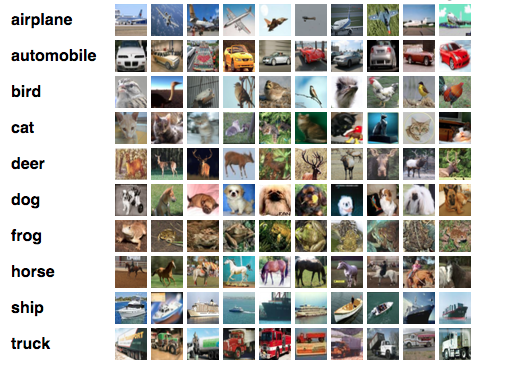

#<u>**Steps for image classification on CIFAR-10:**</u>

##**<font color='red'><u>1. Import the required layers and modules to create our convolution neural net architecture**

####`Import all the required libraries and modules. This includes importing tensorflow and other modules like numpy.`

In [ ]:
import tensorflow as tf  
 
# Display the version
print(tf.__version__)    
 
# other imports
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from keras.layers import GlobalMaxPooling2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.models import Model

2.8.2


####`The output of the above code should display the version of tensorflow you are using eg 2.4.1 or any other.`

####`Now we have the required module support so let’s load in our data.`


---







##**<font color='red'><u>2. Load the dataset from keras datasets module**




####`The dataset of CIFAR-10 is available on tensorflow keras API, and we can download it on our local machine using keras.datasets.cifar10 and then distribute it to train and test set using load_data() function.`
####`Load in the data`




In [ ]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10
 
# Distribute it to train and test set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

170508288/170498071 [==============================] - 5s 0us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)





---


####`Output:`

####`The output of the above code will display the shape of all four partitions and will look something like the above result.`



---











####`Here we can see we have 5000 training images and 1000 test images as specified above and all the images are of 32 by 32 size and have 3 color channels i.e. images are color images. As well as it is also visible that there is only a single label assigned with each image.`



---


####`Until now, we have our data with us. But still, we cannot be sent it directly to our neural network. We need to process the data in order to send it to the network. The first thing in the process is to reduce the pixel values. Currently, all the image pixels are in a range from 1-256, and we need to reduce those values to a value ranging between 0 and 1. This enables our model to easily track trends and efficient training. We can do this simply by dividing all pixel values by 255.0.`



---







##**<font color='red'><u>3. Convert the pixel values of the dataset to float type and then normalize the dataset**

In [ ]:
# Reduce pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
 
# flatten the label values
y_train, y_test = y_train.flatten(), y_test.flatten()

####`Flatten(in simple words rearrange them in form of a row) the label values using the flatten() function. `


---



##**<font color='red'><u>4. Plot some images from the dataset to visualize the dataset**

####`We can visualize it in a subplot grid form. Since the image size is just 32×32 so don’t expect much from the image. It would be a blurred one. We can do the visualization using the subplot() function from matplotlib and looping over the first 25 images from our training dataset portion.`



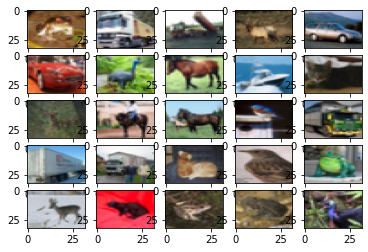

In [ ]:
# visualize data by plotting images
fig, ax = plt.subplots(5, 5)
k = 0
 
for i in range(5):
    for j in range(5):
        ax[i][j].imshow(x_train[k], aspect='auto')
        k += 1
 
plt.show()

Though the images are not clear there are enough pixels for us to specify which object is there in those images. 



---


##**<font color='red'><u>5. Build a Convolutional Neural Network or CNN Layer for traning the model**

####`We are going to use a Convolution Neural Network or CNN to train our model. It includes using a convolution layer in this which is Conv2d layer as well as pooling and normalization methods. Finally, we’ll pass it into a dense layer and the final dense layer which is our output layer. We are using ‘relu‘ activation function. The output layer uses a “softmax” function.`

In [ ]:
# number of classes
K = len(set(y_train))
 
# calculate total number of classes
# for output layer
print("number of classes:", K)
 
# Build the model using the functional API
# input layer
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
 
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
 
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
 
x = Flatten()(x)
x = Dropout(0.2)(x)
 
# Hidden layer
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
 
# last hidden layer i.e.. output layer
x = Dense(K, activation='softmax')(x)
 
model = Model(i, x)

number of classes: 10




---


##**<font color='red'><u>6. View the model summary for better understanding of model architecture**

In [ ]:
# model description
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0     



---


##**<font color='red'><u>7. Compile the model**

####`Model is now ready, it’s time to compile it. We are using model.compile() function to compile our model. For the parameters, we are using `


```
adam optimizer
sparse_categorical_crossentropy as the loss function
metrics=[‘accuracy’]
```





In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



---


##**<font color='red'><u>8.Train the model**

####`Now let’s fit our model using model.fit() passing all our data to it. We are going to train our model till 50 epochs, it gives us a fair result though you can tweak it if you want.`

In [ ]:
# Fit
r = model.fit(
  x_train, y_train, validation_data=(x_test, y_test), epochs=50)

Epoch 1/50
1563/1563 [==============================] - 23s 7ms/step - loss: 1.3108 - accuracy: 0.5476 - val_loss: 1.1572 - val_accuracy: 0.5957
Epoch 2/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8478 - accuracy: 0.7048 - val_loss: 0.9327 - val_accuracy: 0.6830
Epoch 3/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6909 - accuracy: 0.7633 - val_loss: 0.7428 - val_accuracy: 0.7415
Epoch 4/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.5824 - accuracy: 0.8012 - val_loss: 0.7989 - val_accuracy: 0.7252
Epoch 5/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.4884 - accuracy: 0.8324 - val_loss: 0.7060 - val_accuracy: 0.7656
Epoch 6/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.4167 - accuracy: 0.8554 - val_loss: 0.6217 - val_accuracy: 0.8018
Epoch 7/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.3480 - accuracy: 0.8790 - val_loss: 0.5876 - val_ac

Output:

The model will start training, and it will look something like this

####`After this, our model is trained. Though it will work fine but to make our model much more accurate we can add data augmentation on our data and then train it again. Calling model.fit() again on augmented data will continue training where it left off. We are going to fir our data on a batch size of 32 and we are going to shift the range of width and height by 0.1 and flip the images horizontally. Then call model.fit again for 50 epochs.`

In [ ]:
# Fit with data augmentation
# Note: if you run this AFTER calling
# the previous model.fit()
# it will CONTINUE training where it left off
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
  width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
 
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
 
r = model.fit(train_generator, validation_data=(x_test, y_test),
              steps_per_epoch=steps_per_epoch, epochs=50)

Epoch 1/50
1562/1562 [==============================] - 31s 19ms/step - loss: 0.5366 - accuracy: 0.8294 - val_loss: 0.5046 - val_accuracy: 0.8343
Epoch 2/50
1562/1562 [==============================] - 30s 19ms/step - loss: 0.4295 - accuracy: 0.8594 - val_loss: 0.4437 - val_accuracy: 0.8543
Epoch 3/50
1562/1562 [==============================] - 30s 19ms/step - loss: 0.3970 - accuracy: 0.8685 - val_loss: 0.4418 - val_accuracy: 0.8533
Epoch 4/50
1562/1562 [==============================] - 30s 19ms/step - loss: 0.3713 - accuracy: 0.8739 - val_loss: 0.4965 - val_accuracy: 0.8482
Epoch 5/50
1562/1562 [==============================] - 30s 19ms/step - loss: 0.3616 - accuracy: 0.8789 - val_loss: 0.4841 - val_accuracy: 0.8412
Epoch 6/50
1562/1562 [==============================] - 30s 19ms/step - loss: 0.3372 - accuracy: 0.8882 - val_loss: 0.4274 - val_accuracy: 0.8564
Epoch 7/50
1562/1562 [==============================] - 30s 19ms/step - loss: 0.3375 - accuracy: 0.8875 - val_loss: 0.4367 -



---


##**<font color='red'><u>9. Visualize the accuracy per iteration**





####`Now we have trained our model, before making any predictions from it let’s visualize the accuracy per iteration for better analysis. Though there are other methods that include confusion matrix for better analysis of the model.`

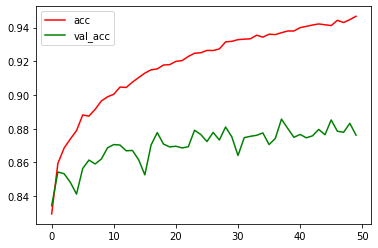

In [ ]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc', color='red')
plt.plot(r.history['val_accuracy'], label='val_acc', color='green')
plt.legend()



---


##**<font color='red'><u>10. Prediction from the model**




####`Let’s make a prediction over an image from our model using model.predict() function. Before sending the image to our model we need to again reduce the pixel values between 0 and 1 and change its shape to (1,32,32,3) as our model expects the input to be in this form only. To make things easy let us take an image from the dataset itself. It is already in reduced pixels format still we have to reshape it (1,32,32,3) using reshape() function. Since we are using data from the dataset we can compare the predicted output and original output. `

Original label is automobile and predicted label is automobile


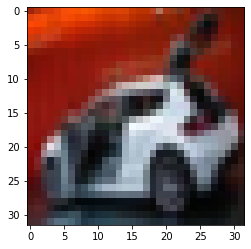

In [ ]:
# label mapping
 
labels = '''airplane automobile bird cat deerdog frog horseship truck'''.split()
 
# select the image from our test dataset
image_number = 6
 
# display the image
plt.imshow(x_test[image_number])
 
# load the image in an array
n = np.array(x_test[image_number])
 
# reshape it
p = n.reshape(1, 32, 32, 3)
 
# pass in the network for prediction and
# save the predicted label
predicted_label = labels[model.predict(p).argmax()]
 
# load the original label
original_label = labels[y_test[image_number]]
 
# display the result
print("Original label is {} and predicted label is {}".format(
    original_label, predicted_label))

####`Now we have the output as Original label is automobile and the predicted label is also automobile.`


---



##**<font color='red'><u>11. Save the model**

####`Save our model using model.save() function as an h5 file. If you are using Google collab you can download your model from the files section.`

In [ ]:
# save the model
model.save('ImageClassification.h5')

####`Hence, in this way, one can classify images using Tensorflow.`


---

